In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('C:/Users/Ruchita/Downloads/Datascience/claimants.csv')

In [3]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
df.drop(['CASENUM'] , inplace=True, axis=1)

In [5]:
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [6]:
df.shape

(1340, 6)

In [7]:
df=df.dropna()
df.shape

(1096, 6)

In [8]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [9]:
y

0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64

In [10]:
df=LogisticRegression()
df.fit(x,y)

LogisticRegression()

In [11]:
y_pred=df.predict(x)

In [12]:
y_pred_df=pd.DataFrame({'actual':y, 'pridected_prob':df.predict(x)})

In [13]:
y_pred_df

,actual,pridected_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y,y_pred)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [15]:
((381+395)/(381+197+123+395))*100

70.8029197080292

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



Text(0, 0.5, 'True Positive Rate')

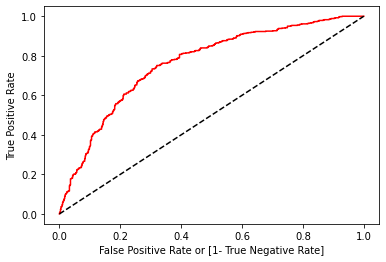

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds=roc_curve(y, df.predict_proba (x)[:,1])

auc=roc_auc_score(y,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model(area= %0.2f)' %auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate or [1- True Negative Rate]')
plt.ylabel('True Positive Rate')

In [19]:
auc

0.7108589063606365